# Fully Connected Neural Network



In this section, I train several neural networks and test them on the [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset:

Features

- Activation units: Affine Transformation, ReLU
- Regularisation: L2, Dropout 
- Preprocessing: Gaussian Weight Initialisation, Batch Normalisation Layers
- Learning algorithms: Stochastic Gradient Descent, Momentum, RMSProp , Adam, Momentum

Best model accuracy using SGD with momentum: 53.6%
Outperforms baseline classifiers by 1.41x.

(I chose not to use regularisation in my model since there seems to be negligible overfitting to the training data due to use of batch normalisations)

In [52]:
import random
import numpy as np
from data_utils import *
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [53]:
# Load the (preprocessed) CIFAR10 data.

data = get_CIFAR10_data()
for k, v in data.iteritems():
    print '%s: ' % k, v.shape

X_val:  (1000, 3, 32, 32)
X_train:  (49000, 3, 32, 32)
X_test:  (1000, 3, 32, 32)
y_val:  (1000,)
y_train:  (49000,)
y_test:  (1000,)


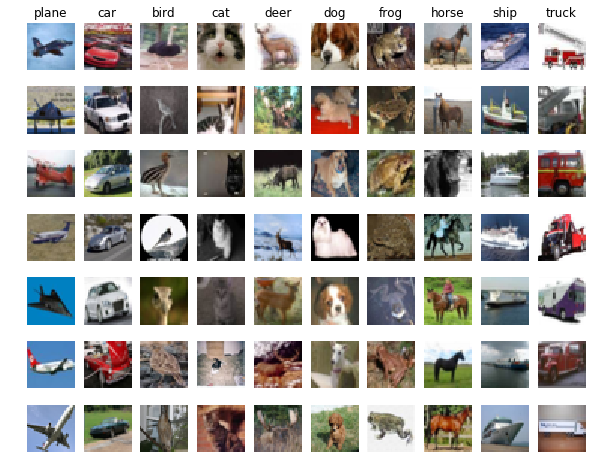

In [98]:
cifar10_dir = 'datasets/cifar-10-batches-py'
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [56]:
from neural_networks.classifiers.fc_net import FullyConnectedNet
from neural_networks import *

I tuned the models' learning rates manually by hand, or else my Macbook Pro would explode from overheating after running all the possible hyperparameters.

running with  sgd

running with  sgd_momentum

running with  adam

running with  rmsprop



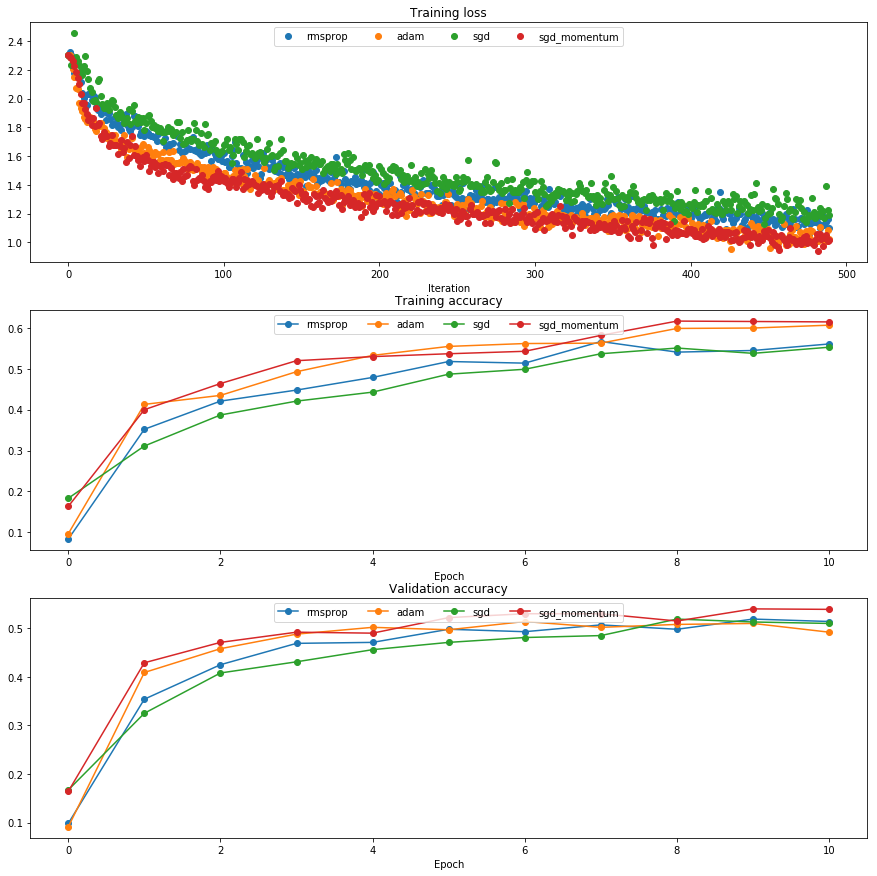

In [107]:
learning_rates = {'rmsprop': 7e-4, 'adam': 7e-3, 'sgd': 2e-1, 'sgd_momentum': 3e-2 }
for update_rule in ['sgd', 'sgd_momentum', 'adam', 'rmsprop']:
  print 'running with ', update_rule
  model = FullyConnectedNet([100, 100, 100, 100, 100], use_batchnorm=True, weight_scale=4e-3)

  solver = Solver(model, data,
                  num_epochs=10, batch_size=1000,
                  update_rule=update_rule,
                  optim_config={
                    'learning_rate': learning_rates[update_rule]
                  },
                  verbose=False)
  solvers[update_rule] = solver
  solver.train()
  print

plt.subplot(3, 1, 1)
plt.title('Training loss')
plt.xlabel('Iteration')

plt.subplot(3, 1, 2)
plt.title('Training accuracy')
plt.xlabel('Epoch')

plt.subplot(3, 1, 3)
plt.title('Validation accuracy')
plt.xlabel('Epoch')

for update_rule, solver in solvers.iteritems():
  plt.subplot(3, 1, 1)
  plt.plot(solver.loss_history, 'o', label=update_rule)
  
  plt.subplot(3, 1, 2)
  plt.plot(solver.train_acc_history, '-o', label=update_rule)

  plt.subplot(3, 1, 3)
  plt.plot(solver.val_acc_history, '-o', label=update_rule)
  
for i in [1, 2, 3]:
  plt.subplot(3, 1, i)
  plt.legend(loc='upper center', ncol=4)
plt.gcf().set_size_inches(15, 15)
plt.show()

In [108]:
X_test = data['X_test']
X_val = data['X_val']
y_val = data['y_val']
y_test = data['y_test']

for update_rule, solver in solvers.iteritems():
    
    y_test_pred = np.argmax(solver.model.loss(X_test), axis=1)
    y_val_pred = np.argmax(solver.model.loss(X_val), axis=1)
    print ' Update rule used: %s' % update_rule
    print 'Validation set accuracy: ', (y_val_pred == y_val).mean()
    print 'Test set accuracy: %f \n' % (y_test_pred == y_test).mean()

 Update rule used: rmsprop
Validation set accuracy:  0.517
Test set accuracy: 0.512000 

 Update rule used: adam
Validation set accuracy:  0.52
Test set accuracy: 0.509000 

 Update rule used: sgd
Validation set accuracy:  0.509
Test set accuracy: 0.510000 

 Update rule used: sgd_momentum
Validation set accuracy:  0.557
Test set accuracy: 0.536000 



sgd


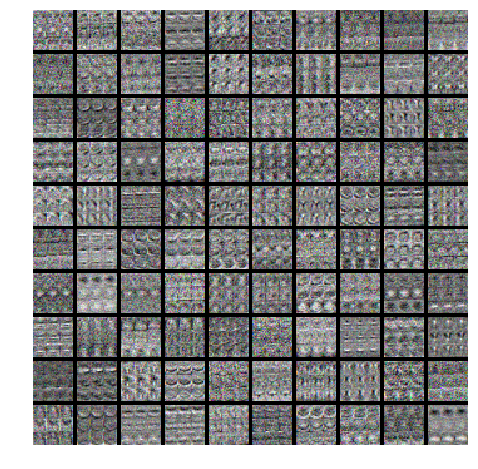





sgd_momentum


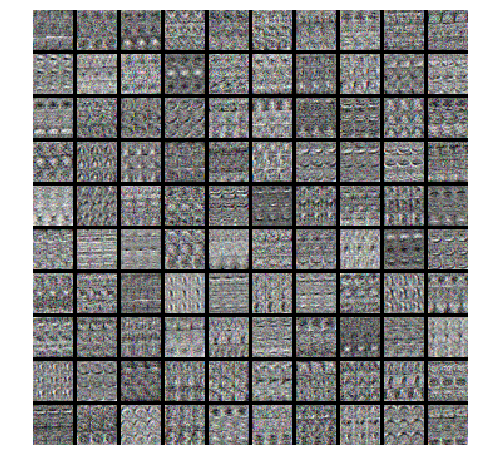





adam


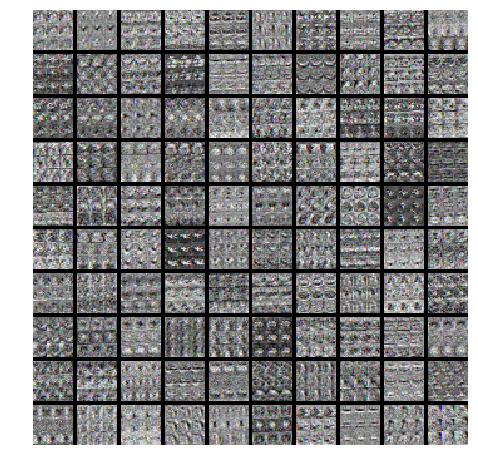





rmsprop


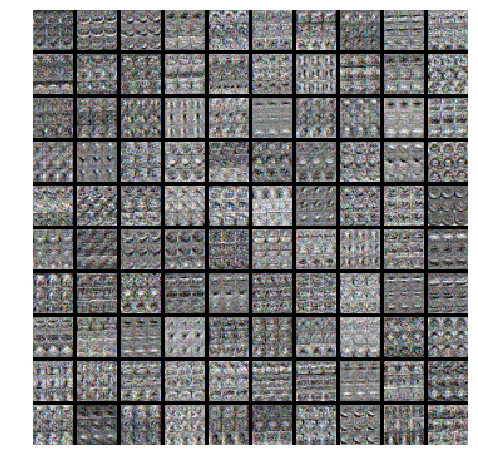

In [122]:
# Visualise the first layer of weights of each model.

from vis_utils import visualize_grid

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()
    print "\n"

for update_rule in ['sgd', 'sgd_momentum', 'adam', 'rmsprop']:
    print update_rule
    show_net_weights(solvers[update_rule].model)
    print '\n'

It's interesting to note that all of the models appear to have similar weights, even though the order in which each weight appears may be different.